Agenda 
    Clean loan Approval dataset
    train randomForestClassifier on data
    evaluate performance metrics 
    visualise feature importance


In [1]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,roc_curve
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df[' education'].unique()
encoder = LabelEncoder()
df[' education'] = encoder.fit_transform(df[' education'])
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,1,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,0,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,0,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,1,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df[' loan_status'].unique()
encoder_ = LabelEncoder()
df[' loan_status'] = encoder_.fit_transform(df[' loan_status'])
df.head()
df[' loan_status'].unique()

array([0, 1])

In [5]:
df[' self_employed'].unique()
encoder__ = LabelEncoder()
df[' self_employed'] = encoder__.fit_transform(df[' self_employed'])
df.head()
df[' self_employed'].unique()

array([0, 1])

In [6]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
X = df.drop(columns=[' loan_status'])
y = df[' loan_status']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)


In [8]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)


rf_model_accuracy = accuracy_score(y_pred,y_test)
rf_model_recall_score = recall_score(y_pred,y_test)
rf_model_precision_score = precision_score(y_pred,y_test)
rf_model_f1_score = f1_score(y_pred,y_test,average='weighted')
rf_model_rc_auc_score = roc_auc_score(y_pred,y_test)


In [9]:
#report
print(f"""
Performnce Report
- Random Forest
    - Accuracy : {rf_model_accuracy:.3f}
    - F1 Score : {rf_model_f1_score:.3f}
    - ROC AUC Score : {rf_model_rc_auc_score:.3f}
    - Recall Score : {rf_model_recall_score}
    - Precision Score : {rf_model_precision_score}
""")


Performnce Report
- Random Forest
    - Accuracy : 0.977
    - F1 Score : 0.977
    - ROC AUC Score : 0.976
    - Recall Score : 0.9715189873417721
    - Precision Score : 0.9654088050314465



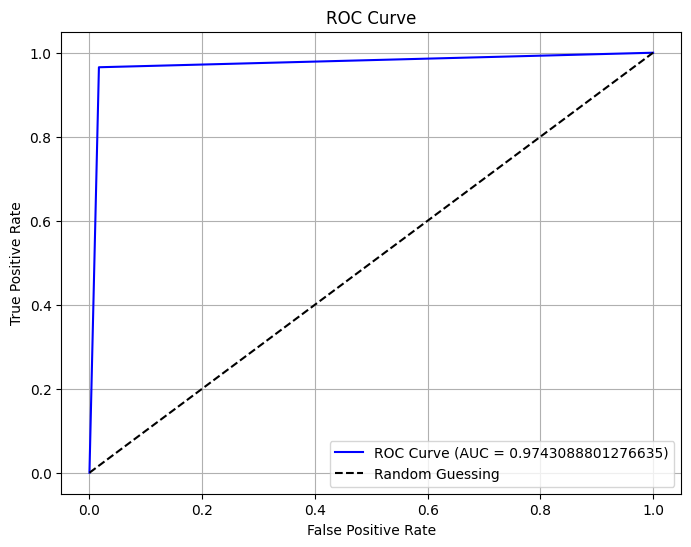

In [10]:
#plotting ROC AUC curve for RandomForest

roc_auc = roc_auc_score(y_test, y_pred)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

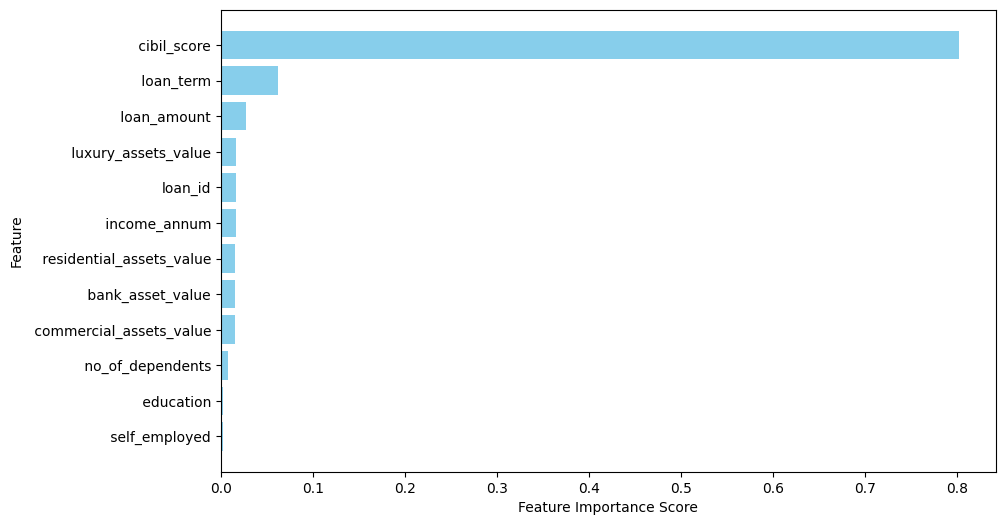

In [11]:
#feature Importances
feature_importance = rf_model.feature_importances_
feature_names = x_train.columns

importance_df = pd.DataFrame({
    'feature':feature_names,
    "importance":feature_importance
}).sort_values(by ='importance',ascending = False)

#Plotting feature importances

plt.figure(figsize=(10,6))
plt.barh(importance_df['feature'],importance_df['importance'],color = 'skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()